# Hive

In this Notebook we will see how to create a Hive table, upload data to the table and perform queries on it.

## Download the file
Create a folder which we will call example-hive, where we will download the file. The folder path will be /media/notebooks/example-hive.


In [1]:
!pwd

/media/notebooks


In [2]:
import os
! mkdir -p /media/notebooks/example-hive
os.chdir("/media/notebooks/example-hive")
! pwd

/media/notebooks/example-hive


In [4]:
# Download the file 
! wget https://github.com/Vega90/datasets/raw/main/Stars_Names.csv \
-O /media/notebooks/example-hive/Stars_Names.csv 

--2024-11-09 17:27:22--  https://github.com/Vega90/datasets/raw/main/Stars_Names.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Vega90/datasets/main/Stars_Names.csv [following]
--2024-11-09 17:27:22--  https://raw.githubusercontent.com/Vega90/datasets/main/Stars_Names.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16394 (16K) [text/plain]
Saving to: ‘/media/notebooks/example-hive/Stars_Names.csv’

/media/notebooks/ex 100%[===================>]  16.01K  --.-KB/s    in 0.001s  

2024-11-09 17:27:22 (10.8 MB/s) - ‘/media/notebooks/example-hive/Stars_Names.csv’ saved [16394/16394]



## Create the table in Hive

Create a file with hql extension, where we can write our queries in HiveQL language and then execute it using the command '-f'. followed by the file name in beeline from Jupyter.

In [5]:
%%writefile create-table-stars.hql
CREATE TABLE stars(
     Name STRING,
     Constellation STRING,
     BayernDesignation STRING,
     Designation STRING,
     ApprovalDate DATE
)
ROW FORMAT DELIMITED
FIELDS TERMINATED BY ','
STORED AS TEXTFILE
LOCATION '/example-hive/'
TBLPROPERTIES ("skip.header.line.count"="1");

Writing create-table-stars.hql


Once the file containing the query is created, we execute it from beeline using the following command:


In [7]:
!beeline -u "jdbc:hive2://" -f create-table-stars.hql

SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/local/hive/lib/log4j-slf4j-impl-2.18.0.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/usr/local/hadoop/share/hadoop/common/lib/slf4j-reload4j-1.7.36.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.apache.logging.slf4j.Log4jLoggerFactory]
SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/local/hive/lib/log4j-slf4j-impl-2.18.0.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/usr/local/hadoop/share/hadoop/common/lib/slf4j-reload4j-1.7.36.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.apache.logging.slf4j.Log4jLoggerFactory]
Connecting to jdbc:hive2://
Hive Session

To ensure that the table has been created, we will use the command '-e' followed by the query `show tables` we want to perform:

In [8]:
!beeline -u jdbc:hive2:// -e "show tables;"

SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/local/hive/lib/log4j-slf4j-impl-2.18.0.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/usr/local/hadoop/share/hadoop/common/lib/slf4j-reload4j-1.7.36.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.apache.logging.slf4j.Log4jLoggerFactory]
SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/local/hive/lib/log4j-slf4j-impl-2.18.0.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/usr/local/hadoop/share/hadoop/common/lib/slf4j-reload4j-1.7.36.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.apache.logging.slf4j.Log4jLoggerFactory]
Connecting to jdbc:hive2://
Hive Session

## Upload data into the table

Now we will upload to HDFS the Stars_Names.csv file. We will do it to a folder called /example-hive that we have to create as well:

In [9]:
# Create the folder
! hdfs dfs -mkdir /example-hive

# Upload the file stars_names.csv
! hdfs dfs -put /media/notebooks/example-hive/Stars_Names.csv /example-hive

# Check
! hdfs dfs -ls /example-hive

mkdir: `/example-hive': File exists
Found 1 items
-rw-r--r--   3 root supergroup      16394 2024-11-09 17:33 /example-hive/Stars_Names.csv


Execute a query to load the data into the table from the file we just uploaded to HDFS:

In [10]:
# Load the data into the table
! beeline -u "jdbc:hive2://" -e \
"LOAD DATA INPATH '/example-hive/Stars_Names.csv' \
INTO TABLE stars;"

SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/local/hive/lib/log4j-slf4j-impl-2.18.0.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/usr/local/hadoop/share/hadoop/common/lib/slf4j-reload4j-1.7.36.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.apache.logging.slf4j.Log4jLoggerFactory]
SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/local/hive/lib/log4j-slf4j-impl-2.18.0.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/usr/local/hadoop/share/hadoop/common/lib/slf4j-reload4j-1.7.36.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.apache.logging.slf4j.Log4jLoggerFactory]
Connecting to jdbc:hive2://
Hive Session

We can make sure that the data has been loaded correctly by performing a query that returns the first three records:

In [12]:
! beeline -u "jdbc:hive2://" -e "SELECT * FROM stars LIMIT 3;"

SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/local/hive/lib/log4j-slf4j-impl-2.18.0.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/usr/local/hadoop/share/hadoop/common/lib/slf4j-reload4j-1.7.36.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.apache.logging.slf4j.Log4jLoggerFactory]
SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/local/hive/lib/log4j-slf4j-impl-2.18.0.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/usr/local/hadoop/share/hadoop/common/lib/slf4j-reload4j-1.7.36.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.apache.logging.slf4j.Log4jLoggerFactory]
Connecting to jdbc:hive2://
Hive Session

## Query the table

Now that we have the table we can perform several queries. For example, a simple query like is to get us the records for the month of November 2016:

In [15]:
!beeline -u "jdbc:hive2://" -e \
"SELECT * FROM stars \
WHERE YEAR(approvaldate)= 2016 AND MONTH(approvaldate) = 11;"

SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/local/hive/lib/log4j-slf4j-impl-2.18.0.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/usr/local/hadoop/share/hadoop/common/lib/slf4j-reload4j-1.7.36.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.apache.logging.slf4j.Log4jLoggerFactory]
SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/local/hive/lib/log4j-slf4j-impl-2.18.0.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/usr/local/hadoop/share/hadoop/common/lib/slf4j-reload4j-1.7.36.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.apache.logging.slf4j.Log4jLoggerFactory]
Connecting to jdbc:hive2://
Hive Session

In a more complex query, Hive will do the Map and Reduce processes for us. For example, if we wanted to know the five constellations with the most stars, we could perform a query by creating an hql extension file and calling it from beeline:

In [16]:
%%writefile query.hql
SELECT COUNT(*) as num_estrellas, constellation 
FROM stars 
GROUP BY constellation 
ORDER BY num_estrellas DESC 
LIMIT 5;

Writing query.hql


In [17]:
!beeline -u "jdbc:hive2://" -f query.hql

SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/local/hive/lib/log4j-slf4j-impl-2.18.0.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/usr/local/hadoop/share/hadoop/common/lib/slf4j-reload4j-1.7.36.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.apache.logging.slf4j.Log4jLoggerFactory]
SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/local/hive/lib/log4j-slf4j-impl-2.18.0.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/usr/local/hadoop/share/hadoop/common/lib/slf4j-reload4j-1.7.36.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.apache.logging.slf4j.Log4jLoggerFactory]
Connecting to jdbc:hive2://
Hive Session

If we look at the MapReduce job trace, we can see how two MapReduce jobs have been launched in this query. This is because, for this query, the two datanodes of the cluster have been used, each of them has performed part of the job. If we now enter the jobhistory of the Yarnmanager container we will see two jobs for this query.

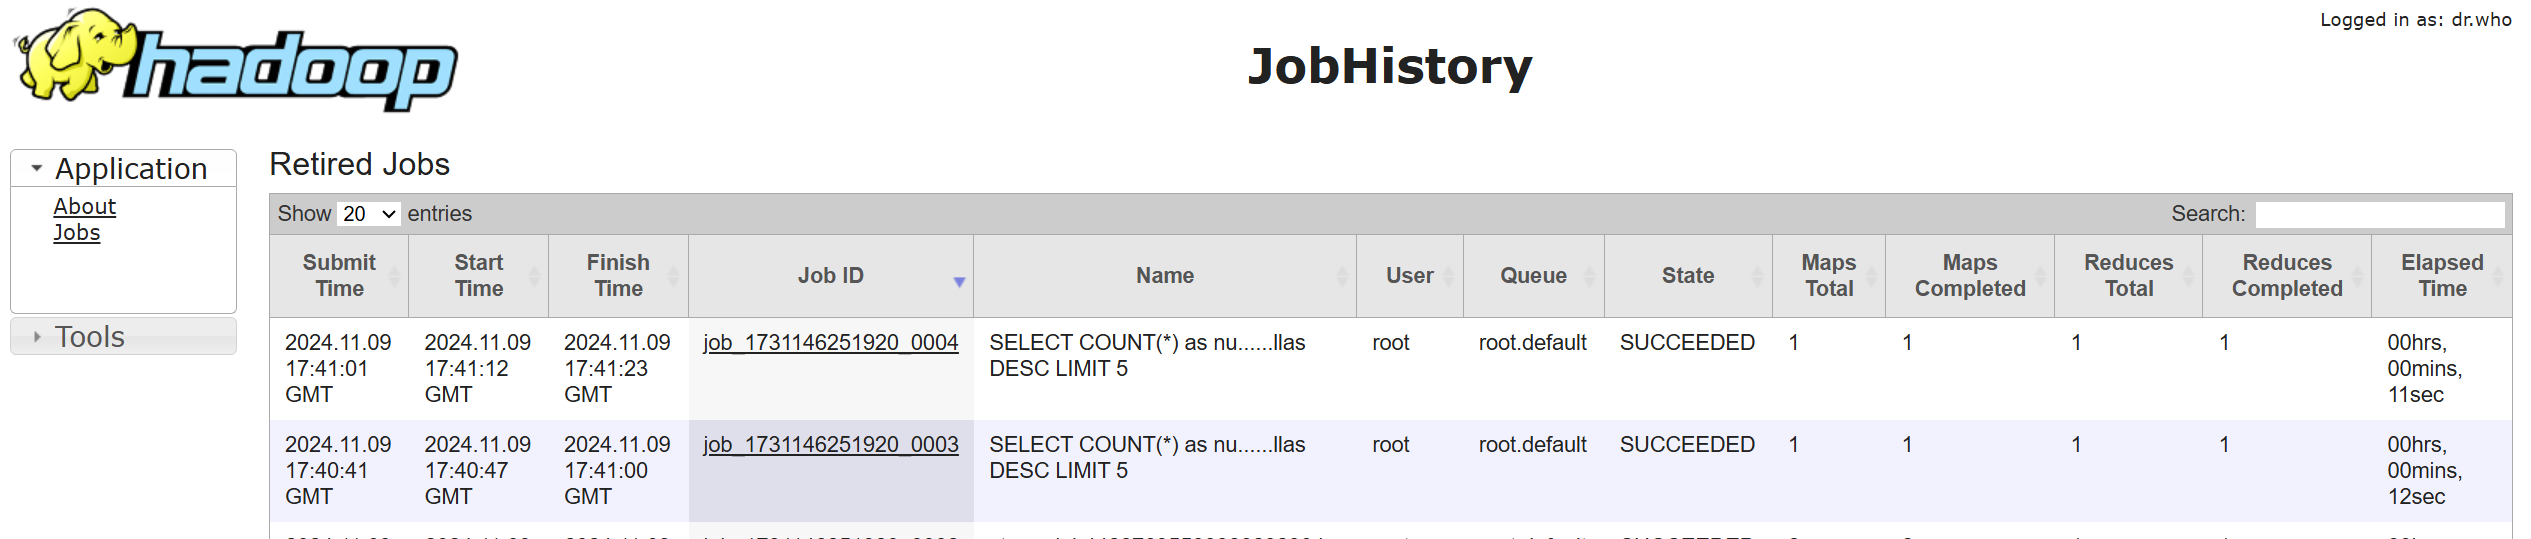